In [148]:
import sys
sys.path.append('A:\MSBGD\Data_Challenge')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

random_state = 42

In [149]:
with open('../data/data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender_class', ylabel='Count'>

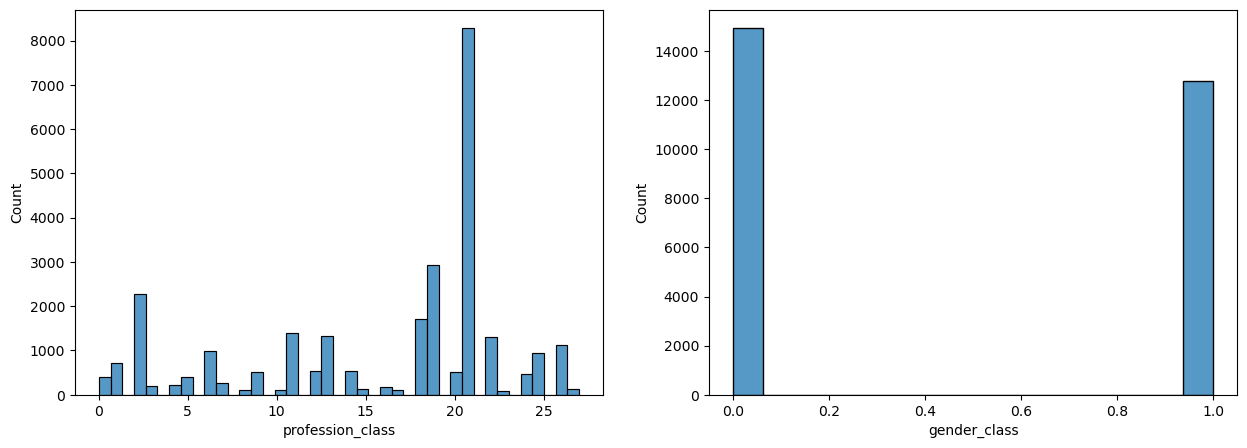

In [150]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(Y,) 
plt.subplot(1,2,2)
sns.histplot(S)


In [151]:
print(X.iloc[:,1])

28553    0.202686
6286     0.003188
36284    0.210670
12083    0.118481
7859    -0.052143
           ...   
6265    -0.340833
11284   -0.081198
38158   -0.441524
860     -0.053005
15795    0.010459
Name: 1, Length: 27749, dtype: float32


d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='200', ylabel='Count'>

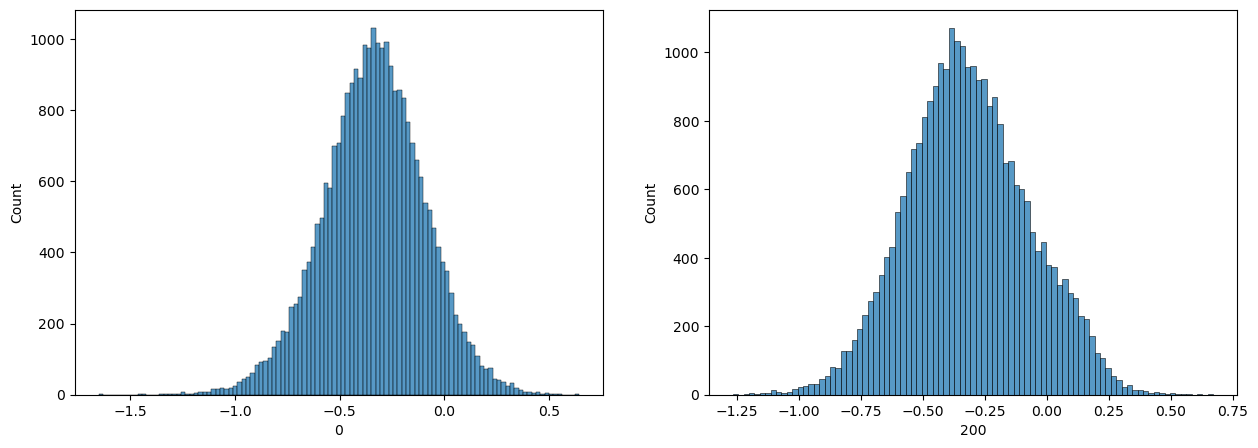

In [152]:
# distribution of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(X.iloc[:,0])
plt.subplot(1,2,2)
sns.histplot(X.iloc[:,200])

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender_class', ylabel='Count'>

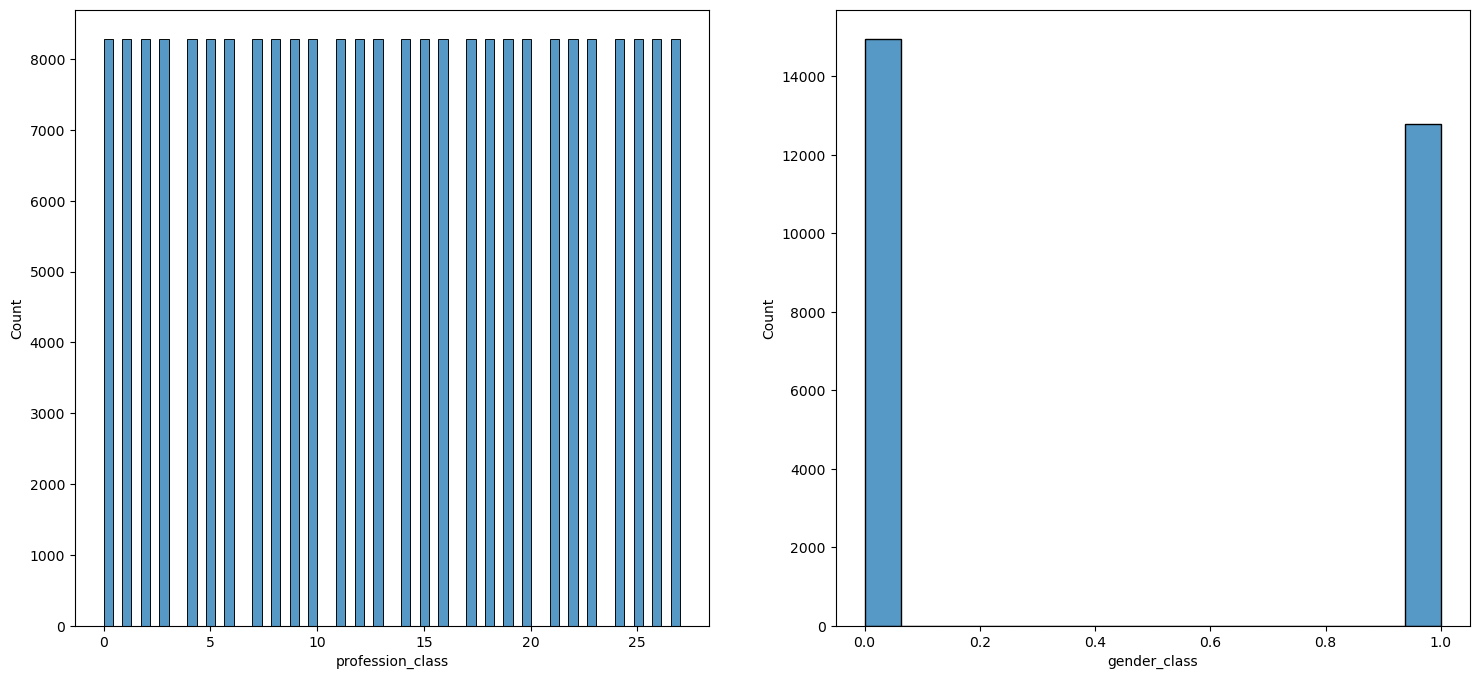

In [153]:
# balance classes with SMOTE
sm = SMOTE(random_state=random_state)
X_res, Y_res = sm.fit_resample(X, Y)
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.histplot(Y_res,)
plt.subplot(1,2,2)
sns.histplot(S)

In [154]:
# normalize X
X_res = (X_res - X_res.mean()) / X_res.std()

d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\ML_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='200', ylabel='Count'>

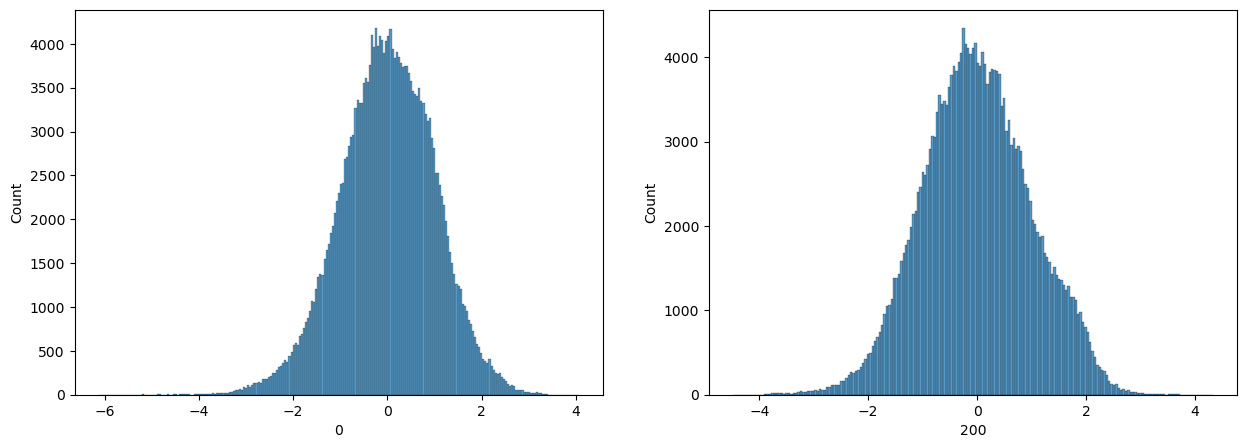

In [155]:
# distribution of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(X_res.iloc[:,0])
plt.subplot(1,2,2)
sns.histplot(X_res.iloc[:,200])

<Axes: >

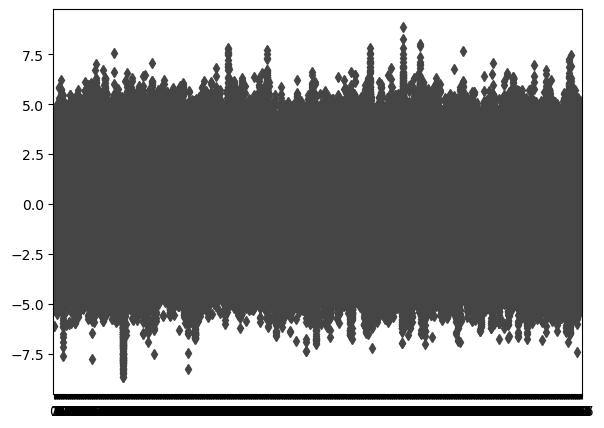

In [156]:
# boxplot of X
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_res)


In [157]:
X_res.shape

(231980, 768)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_res, Y_res, test_size=0.2, random_state=random_state)

In [166]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(768, 256) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 28)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [167]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.01)

print(X_res[:2])
print(Y_res[:2])
for epoch in range(30):
    inputs = X_res[:2]
    labels = Y_res[:2]
    inputs = torch.tensor(inputs.values).float()
    labels = torch.tensor(labels.values).long()
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()
    optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000, loss.item()))

# print prediction and true label
print(outputs)
print(labels)

        0         1         2         3         4         5         6    \
0  0.729705  0.893307  1.052398 -0.245486  0.939000 -0.153556 -1.484978   
1  1.458828  0.022887 -1.109332 -0.567263  0.530419  0.014908  0.388898   

        7         8         9    ...       758       759       760       761  \
0 -0.635741  0.022123 -1.014857  ...  0.367281  1.084962  2.613393  0.092459   
1  0.058353 -0.791927 -0.569611  ... -0.140000 -0.957720 -0.304713 -1.857246   

        762       763       764       765       766       767  
0  1.474127  0.278868 -1.615864 -0.080357 -0.604681  1.271198  
1 -2.070409 -0.049790  0.526030  0.172823 -0.271252 -0.285356  

[2 rows x 768 columns]
0    6
1    9
Name: profession_class, dtype: int64
tensor(3.3413, grad_fn=<NllLossBackward0>)
Epoch [1/1000], Loss: 3.3413
tensor(2.4559, grad_fn=<NllLossBackward0>)
Epoch [2/1000], Loss: 2.4559
tensor(2.3937, grad_fn=<NllLossBackward0>)
Epoch [3/1000], Loss: 2.3937
tensor(2.3918, grad_fn=<NllLossBackward0>)
Epoch [

In [160]:
# split data
X_train, X_val, Y_train, Y_val = train_test_split(X_res, Y_res, test_size=0.2, random_state=random_state)

In [169]:
def train_model(model, X, Y, epochs, lr, batch_size):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            inputs = X[i:i+batch_size]
            labels = Y[i:i+batch_size]
            inputs = torch.tensor(inputs.values).float()
            labels = torch.tensor(labels.values).long()
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))
    return model

mlp = MLP()
mlp = train_model(mlp, X_train, Y_train, 30, 0.001, 1000)

# test model
inputs = X_val
labels = Y_val
inputs = torch.tensor(inputs.values).float()
labels = torch.tensor(labels.values).long()
mlp.eval()
with torch.no_grad():
    outputs = mlp(inputs)
    loss = criterion(outputs, labels)
    print('Test Loss: {:.4f}'.format(loss.item()))
    print("Accuracy: ", (outputs.argmax(1) == labels).sum().item() / labels.shape[0])

    X_test = dat['X_test']
    X_test = (X_test - X_test.mean()) / X_test.std()
    inputs = X_test
    inputs = torch.tensor(inputs.values).float()
    pred = mlp(inputs)
    pred = pred.argmax(1)
    results=pd.DataFrame(pred, columns= ['score'])
    results.to_csv("Data_Challenge_MDI_341.csv", header = None, index = None)

Epoch [1/30], Loss: 2.4829
Epoch [2/30], Loss: 2.4525
Epoch [3/30], Loss: 2.4386
Epoch [4/30], Loss: 2.4295
Epoch [5/30], Loss: 2.4225
Epoch [6/30], Loss: 2.4182
Epoch [7/30], Loss: 2.4158
Epoch [8/30], Loss: 2.4131
Epoch [9/30], Loss: 2.4114
Epoch [10/30], Loss: 2.4097
Epoch [11/30], Loss: 2.4058
Epoch [12/30], Loss: 2.4045
Epoch [13/30], Loss: 2.4030
Epoch [14/30], Loss: 2.4022
Epoch [15/30], Loss: 2.4012
Epoch [16/30], Loss: 2.4011
Epoch [17/30], Loss: 2.4006
Epoch [18/30], Loss: 2.3999
Epoch [19/30], Loss: 2.3999
Epoch [20/30], Loss: 2.3997
Epoch [21/30], Loss: 2.3992
Epoch [22/30], Loss: 2.3989
Epoch [23/30], Loss: 2.3986
Epoch [24/30], Loss: 2.3985
Epoch [25/30], Loss: 2.3982
Epoch [26/30], Loss: 2.3978
Epoch [27/30], Loss: 2.3962
Epoch [28/30], Loss: 2.3984
Epoch [29/30], Loss: 2.3967
Epoch [30/30], Loss: 2.3973
Loss: 2.4074
